In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

In [2]:
cat = cv2.imread("CATS_DOGS/train/CAT/1.jpg")

In [3]:
cat = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

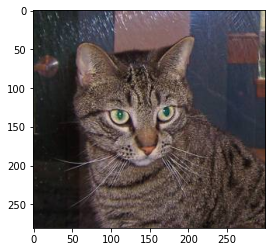

In [4]:
plt.imshow(cat)

In [5]:
cat.shape

(281, 300, 3)

In [6]:
dog = cv2.imread("CATS_DOGS/train/DOG/2.jpg")

In [7]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

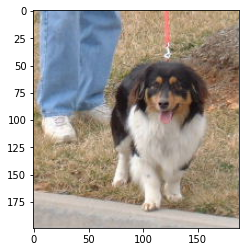

In [8]:
plt.imshow(dog)

In [9]:
dog.shape

(199, 188, 3)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode="nearest"
                              )

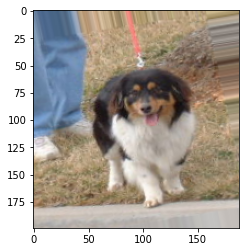

In [12]:
plt.imshow(image_gen.random_transform(dog))

In [13]:
image_gen.flow_from_directory("CATS_DOGS/train/")

Found 18743 images belonging to 2 classes.


In [23]:
input_shape = (150,150,3)

In [24]:
from keras.models import Sequential

In [31]:
from keras.layers import Conv2D,Activation,Flatten,MaxPooling2D,Dense,Dropout

In [33]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18496)            

In [38]:
batch_size = 16

train_img_gen = image_gen.flow_from_directory("CATS_DOGS/train/",
                                             target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode="binary")

Found 18743 images belonging to 2 classes.


In [39]:
test_img_gen = image_gen.flow_from_directory("CATS_DOGS/test/",
                                             target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode="binary")

Found 6251 images belonging to 2 classes.


In [40]:
model.fit_generator(train_img_gen,epochs=100,steps_per_epoch=150,
                   validation_data=test_img_gen,validation_steps=12)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
150/150 [==============================] - 20s 133ms/step - loss: 0.7017 - accuracy: 0.4964 - val_loss: 0.6905 - val_accuracy: 0.5104
Epoch 2/100
 40/150 [=======>......................] - ETA: 13s - loss: 0.6931 - accuracy: 0.5000

/home/bilal/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/home/bilal/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/home/bilal/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/home/bilal/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/home/bilal/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
/home/bilal/anacond

150/150 [==============================] - 20s 133ms/step - loss: 0.6946 - accuracy: 0.4929 - val_loss: 0.6807 - val_accuracy: 0.5833
Epoch 3/100
150/150 [==============================] - 20s 135ms/step - loss: 0.6901 - accuracy: 0.5263 - val_loss: 0.6978 - val_accuracy: 0.5208
Epoch 4/100
150/150 [==============================] - 20s 135ms/step - loss: 0.6862 - accuracy: 0.5562 - val_loss: 0.6716 - val_accuracy: 0.5833
Epoch 5/100
150/150 [==============================] - 20s 132ms/step - loss: 0.6829 - accuracy: 0.5763 - val_loss: 0.6641 - val_accuracy: 0.5312
Epoch 6/100
150/150 [==============================] - 20s 133ms/step - loss: 0.6780 - accuracy: 0.5742 - val_loss: 0.6762 - val_accuracy: 0.6094
Epoch 7/100
150/150 [==============================] - 20s 131ms/step - loss: 0.6723 - accuracy: 0.5917 - val_loss: 0.6757 - val_accuracy: 0.6250
Epoch 8/100
150/150 [==============================] - 20s 131ms/step - loss: 0.6752 - accuracy: 0.5833 - val_loss: 0.6766 - val_accurac

In [66]:
train_img_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [54]:
model.save("100epochsCatandDog.h5")

In [55]:
cat_file = "CATS_DOGS/test/CAT/10007.jpg"

In [57]:
from keras.preprocessing import image

In [58]:
cat_img = image.load_img(cat_file,target_size=(150,150))

In [60]:
cat_img = image.img_to_array(cat_img)

In [61]:
cat_img.shape

(150, 150, 3)

In [62]:
import numpy as np

In [63]:
cat_img = np.expand_dims(cat_img,axis=0)

In [64]:
cat_img.shape

(1, 150, 150, 3)

In [65]:
cat_img = cat_img/255

In [69]:
x = model.predict_classes(cat_img)
if x ==0:
    print("Its a cat")
elif x == 1:
    print("Its a dog")
else:
    print("None")

Its a cat


In [70]:
model.predict(cat_img)

array([[0.01551405]], dtype=float32)